In [70]:
!unzip /content/consumer_complaints.zip

Archive:  /content/consumer_complaints.zip
replace Consumer_Complaints.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Consumer_Complaints.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

In [0]:
data = pd.read_csv('Consumer_Complaints.csv',delimiter=',')

In [73]:
data.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [28]:
data.describe()

,Complaint ID,Unnamed: 18
count,1.025010e+06,0.0
mean,1.646973e+06,NaN
std,8.733867e+05,NaN
min,1.000000e+00,NaN
25%,9.013952e+05,NaN
50%,1.747510e+06,NaN
75%,2.464603e+06,NaN
max,2.893554e+06,NaN


In [29]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [30]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235170
Issue                                 0
Sub-issue                        496157
Consumer Complaint               747196
Company Public Response          706646
Company                               0
State                             12360
ZIP code                          16718
Tags                             883422
Consumer consent provided?       533099
Submitted via                         0
Date Sent to Company                  0
Company Response to Consumer          3
Timely response?                      0
Consumer disputed?               256456
Complaint ID                          0
Unnamed: 18                     1025010
dtype: int64

In [0]:
dropn_cols = ['Consumer Complaint', 'Company Public Response',
            'Tags', 'Consumer consent provided?', 'Unnamed: 18']
data = data.drop(dropn_cols, axis =1)

In [76]:
data.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235170
Issue                                0
Sub-issue                       496157
Company                              0
State                            12360
ZIP code                         16718
Submitted via                        0
Date Sent to Company                 0
Company Response to Consumer         3
Timely response?                     0
Consumer disputed?              256456
Complaint ID                         0
dtype: int64

In [0]:
data['year'] = data['Date received'].map(lambda x: x.split("-")[-1] if "-" in x else x.split("/")[-1])
data['month'] = data['Date received'].map(lambda x: x.split("-")[0] if "-" in x else x.split("/")[0])


In [78]:
data.year.head()


0    2014
1    2016
2    2016
3    2014
4    2014
Name: year, dtype: object

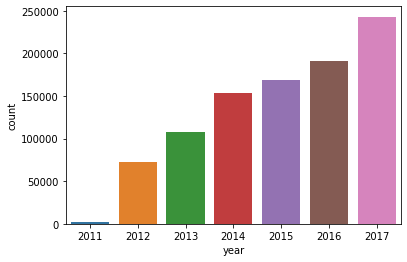

In [79]:
import seaborn as sns

sns.countplot(x='year', data = data[data["year"]!='2018'])

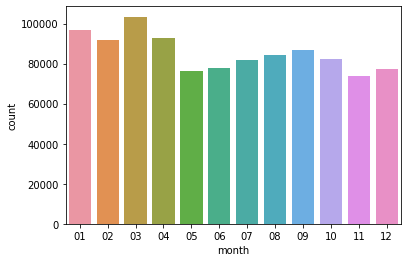

In [80]:
sns.countplot(x="month", data=data)

In [0]:
mapping_old2new = {
    "Auto": "Auto debt",
    "Credit card": "Credit card debt",
    "Federal student loan": "Federal student loan debt",
    "Medical": "Medical debt",
    "Mortgage": "Mortgage debt",
    "Non-federal student loan": "Private student loan debt",
    "Other (i.e. phone, health club, etc.)": "Other debt",
    "Payday loan": "Payday loan debt",
    "Non-federal student loan": "Private student loan",
    "Federal student loan servicing": "Federal student loan",
    "Credit repair": "Credit repair services",
    "Credit reporting": "Credit reporting",
    "Conventional adjustable mortgage (ARM)": "Conventional home mortgage",
    "Conventional fixed mortgage": "Conventional home mortgage",
    "Home equity loan or line of credit": "Home equity loan or line of credit (HELOC)",
    "Other": "Other type of mortgage",
    "Other mortgage": "Other type of mortgage",
    "Second mortgage":"Other type of mortgage",
    "Credit card": "General-purpose credit card or charge card",
    "General purpose card": "General-purpose prepaid card",
    "Gift or merchant card": "Gift card",
    "Electronic Benefit Transfer / EBT card": "Government benefit card",
    "Government benefit payment card": "Government benefit card",
    "ID prepaid card": "Student prepaid card",
    "Other special purpose card":  "Other prepaid card",
    "Store credit card": "Other prepaid card",
    "Transit card": "Other prepaid card",
    "(CD) Certificate of deposit": "CD (Certificate of Deposit)",
    "Other bank product/service": "Other banking product or service",
    "Cashing a check without an account": "Other banking product or service",
    "Vehicle lease": "Lease",
    "Vehicle loan": "Loan",
    "Check cashing": "Check cashing service",
    "Mobile wallet": "Mobile or digital wallet",
    "Traveler’s/Cashier’s checks": "Traveler's check or cashier's check"
}
prod2sub = {
    "Auto debt": "Debt collection",
    "Credit card debt": "Debt collection",
    "Federal student loan debt": "Debt collection",
    "I do not know": "Debt collection",
    "Medical debt": "Debt collection",
    "Mortgage debt": "Debt collection",
    "Private student loan debt": "Debt collection",
    "Other debt": "Debt collection",
    "Payday loan debt": "Debt collection",
    "Credit repair services": "Credit reporting, credit repair services, or other personal consumer reports",
    "Credit reporting": "Credit reporting, credit repair services, or other personal consumer reports",
    "Other personal consumer report": "Credit reporting, credit repair services, or other personal consumer reports",
    "Conventional home mortgage": "Mortgage",
    "FHA mortgage": "Mortgage",
    "Home equity loan or line of credit (HELOC)": "Mortgage",
    "Other type of mortgage": "Mortgage",
    "Reverse mortgage": "Mortgage",
    "VA mortgage": "Mortgage",
    "General-purpose credit card or charge card": "Credit card or prepaid card",
    "General-purpose prepaid card": "Credit card or prepaid card",
    "Gift card": "Credit card or prepaid card",
    "Government benefit card": "Credit card or prepaid card",
    "Student prepaid card": "Credit card or prepaid card",
    "Payroll card": "Credit card or prepaid card",
    "Other prepaid card": "Credit card or prepaid card",
    "CD (Certificate of Deposit)": "Checking or savings account",
    "Checking account": "Checking or savings account",
    "Other banking product or service": "Checking or savings account",
    "Savings account": "Checking or savings account",
    "Lease": "Vehicle loan or lease",
    "Loan": "Vehicle loan or lease",
    "Federal student loan": "Student loan",
    "Private student loan": "Student loan",
    "Installment loan": "Payday loan, title loan, or personal loan",
    "Pawn loan": "Payday loan, title loan, or personal loan",
    "Payday loan": "Payday loan, title loan, or personal loan",
    "Personal line of credit": "Payday loan, title loan, or personal loan",
    "Title loan": "Payday loan, title loan, or personal loan",
    "Check cashing service": "Money transfer, virtual currency, or money service",
    "Debt settlement": "Money transfer, virtual currency, or money service",
    "Domestic (US) money transfer": "Money transfer, virtual currency, or money service",
    "Foreign currency exchange": "Money transfer, virtual currency, or money service",
    "International money transfer": "Money transfer, virtual currency, or money service",
    "Mobile or digital wallet": "Money transfer, virtual currency, or money service",
    "Money order": "Money transfer, virtual currency, or money service",
    "Refund anticipation check": "Money transfer, virtual currency, or money service",
    "Traveler's check or cashier's check": "Money transfer, virtual currency, or money service",
    "Virtual currency": "Money transfer, virtual currency, or money service"
}

In [0]:
def get_subprods(x):
    
    if x['Sub-product'] in mapping_old2new:
        if x['Sub-product']=="Other":
            if x['Product']=='Mortage':
                return("Other type of mortgage")
            else:
                return("Other debt")
        else:
            return(mapping_old2new[x['Sub-product']])
    else:
        return(x['Sub-product'])

data['Sub-product'] = data[['Product','Sub-product']].apply(lambda x: 
                                                                       get_subprods(x), axis =1)

In [0]:
prodmap = {
    "Payday loan": "Payday loan, title loan, or personal loan",
    "Credit reporting": "Credit reporting, credit repair services, or other personal consumer reports",
    "Credit card": "Credit card or prepaid card"
}
def get_product(x):
    
    if not isinstance(x['Sub-product'], str):
        if x['Product'] in prodmap:
            return(prodmap[x['Product']])
        else:
            return(x['Product'])
    else:
        return(prod2sub[x['Sub-product']])
    
data['Product'] = data[['Product','Sub-product']].apply(lambda x: get_product(x), axis =1)

In [84]:
products = data.Product.unique()
print(len(products), products)

9 ['Mortgage'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Vehicle loan or lease' 'Credit card or prepaid card' 'Debt collection'
 'Student loan' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Payday loan, title loan, or personal loan']


Text(0, 0.5, 'Count')

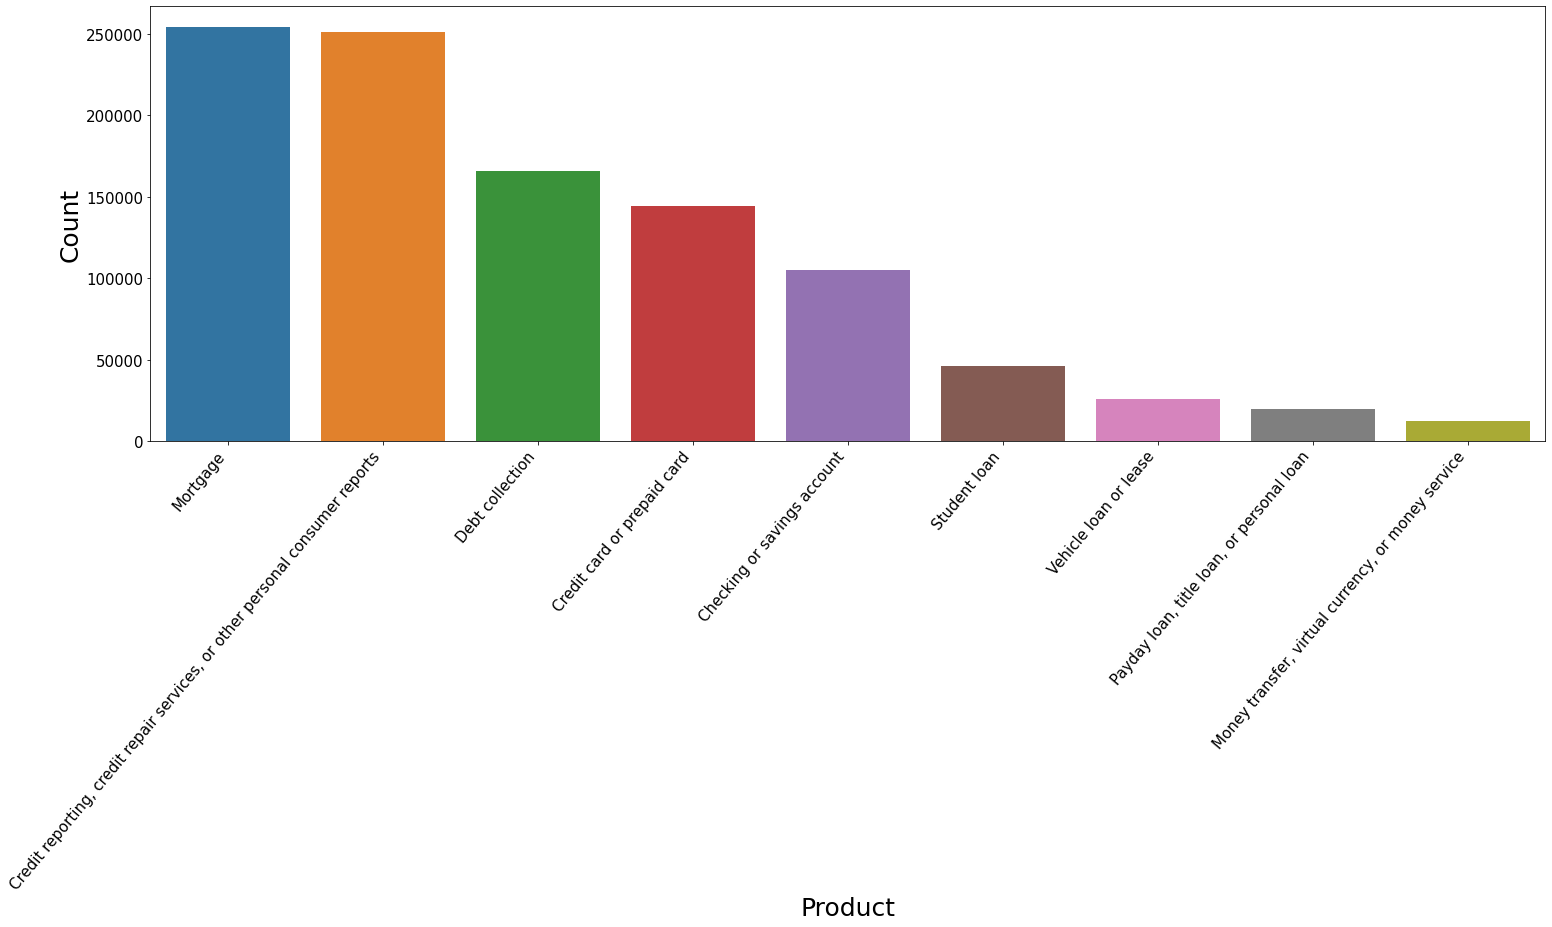

In [86]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Product', data = data,  order = data["Product"].value_counts().index)
g.set_xlabel("Product", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [88]:
from ipywidgets import widgets, interact, interactive
w = widgets.ToggleButtons(
    options=data.Product.value_counts().index,
    description='Product:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     icons=['check'] * 3
)

@interact(product = w)
def plot_subproduct(product=w):
    plt.figure(figsize = (10,5))
    plt.xticks(rotation=50, fontsize=15, ha="right")
    plt.yticks(fontsize=15)
    g = sns.countplot(x='Sub-product', data = data[data.Product==product], 
                                order=data[data.Product==product]["Sub-product"].value_counts().index)
    g.set_xlabel("Sub-products({product})".format(product=product), fontsize=25)
    g.set_ylabel("Count", fontsize=25)

interactive(children=(ToggleButtons(description='Product:', options=('Mortgage', 'Credit reporting, credit rep…

In [90]:
from ipywidgets import widgets, interact, interactive

w = widgets.ToggleButtons(
    options=['Mortgage', 'Credit reporting, credit repair services, or other personal consumer reports',
                             'Debt collection'],
    description='Product:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     icons=['check'] * 3
)
z = widgets.ToggleButtons(
    options= data[data.Product=="Mortgage"]['Sub-product'].unique(),
    description='Sub-Product:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     icons=['check'] * 3
)

def op_update_product(*args):
    z.options = [x for x in data[data.Product == w.value ]['Sub-product'].unique() 
                         if isinstance(x, str)]

w.observe(op_update_product, 'value')

@interact(product = w, subproduct=z)
def plot_issue(product="Mortgage", subproduct="VA mortgage"):
    #op_update_product()
    num_vals = len(data[(data.Product == product) & 
                                                   (data['Sub-product'] == subproduct)]['Issue'].value_counts().index)
    xdim=10
    if num_vals<6:
        xdim=8
    elif num_vals<12:
        xdim = 15
    else:
        xdim=20
        
    plt.figure(figsize = (xdim,6))
    plt.xticks(rotation=50, fontsize=15, ha="right")
    plt.yticks(fontsize=15)
    g = sns.countplot(x='Issue', data = data[(data.Product == product) & 
                                                   (data['Sub-product'] == subproduct)], 
                      order = data[(data.Product == product) & 
                                                   (data['Sub-product'] == subproduct)]['Issue'].value_counts().index)
    g.set_xlabel("Issues related to {Product}".format(Product=product), fontsize=25)
    g.set_ylabel("Count", fontsize=25)

interactive(children=(ToggleButtons(description='Product:', options=('Mortgage', 'Credit reporting, credit rep…

In [91]:
companies = data.groupby('Company').Company.count().sort_values(ascending=False)
print(len(companies))
companies.head()


4780


Company
EQUIFAX, INC.                             83659
BANK OF AMERICA, NATIONAL ASSOCIATION     74423
Experian Information Solutions Inc.       72858
TRANSUNION INTERMEDIATE HOLDINGS, INC.    66269
WELLS FARGO & COMPANY                     62345
Name: Company, dtype: int64

Text(0, 0.5, 'Count')

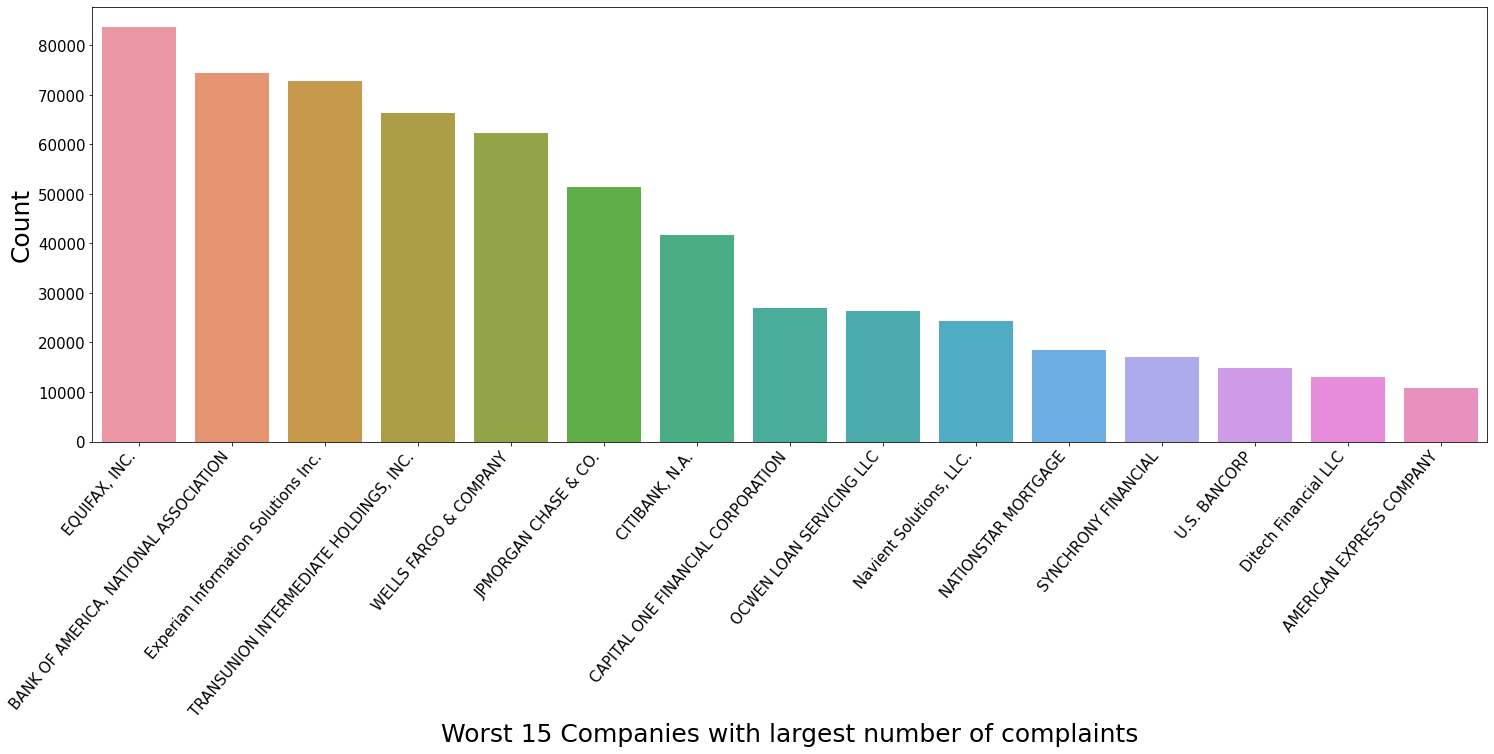

In [92]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.barplot(companies.index[0:15], companies.values[0:15])
g.set_xlabel("Worst 15 Companies with largest number of complaints", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [93]:
!wget http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip -O state.zip
!unzip state.zip

--2020-03-30 17:26:18--  http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip
Resolving www2.census.gov (www2.census.gov)... 104.69.220.237, 2600:1402:a:292::208c, 2600:1402:a:2a6::208c
Connecting to www2.census.gov (www2.census.gov)|104.69.220.237|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip?sec_ak_reference=18.44bef748.1585589178.1c32412e [following]
--2020-03-30 17:26:19--  https://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip?sec_ak_reference=18.44bef748.1585589178.1c32412e
Connecting to www2.census.gov (www2.census.gov)|104.69.220.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘state.zip’

state.zip               [  <=>               ]   3.16M  8.57MB/s    in 0.4s    

2020-03-30 17:26:20 (8.57 MB/s) - ‘state.zip’ saved [3310639]

Archive:  state.zip
  infl

In [96]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 308kB/s 
     |████████████████████████████████| 10.4MB 49.2MB/s 


In [0]:
states_2_rm = ["AK", "PR", "GU", "MP", "VI", "AS","HI"]
map_df = gpd.read_file('cb_2017_us_state_500k.shp')

#select only continuous us states
map_df = map_df[~map_df['STUSPS'].isin(states_2_rm)]

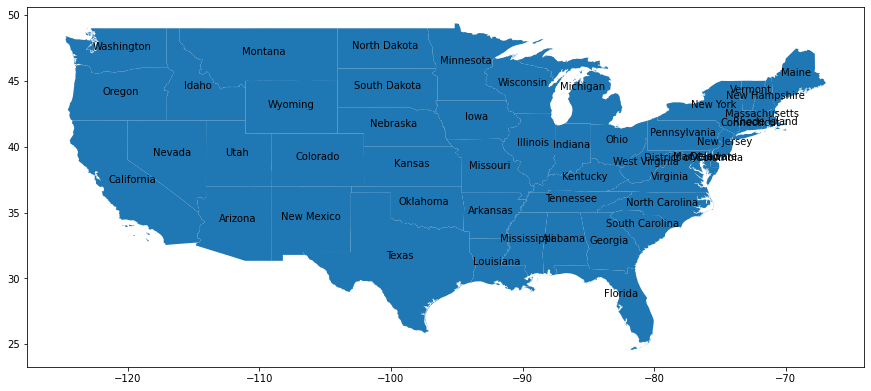

In [98]:
fig, ax = plt.subplots(1, figsize=(15, 8))
map_df.plot(ax=ax)
v=map_df.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

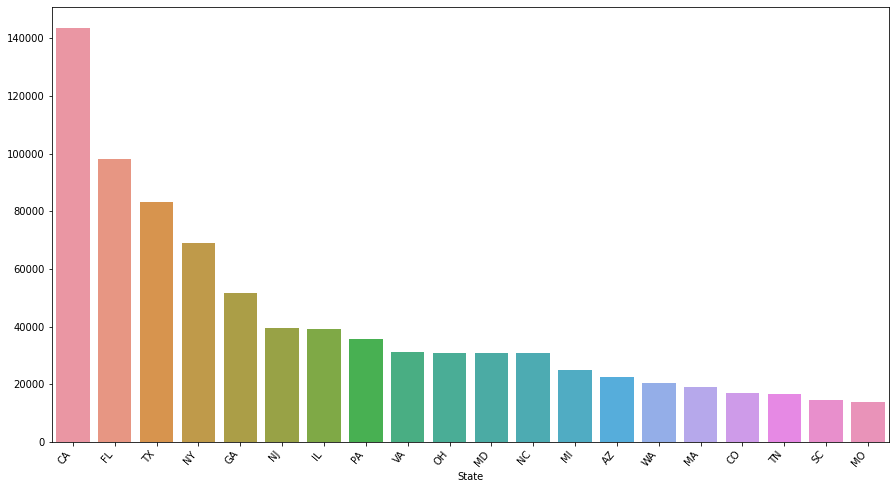

In [99]:
gp_state = data.groupby('State')
plt.figure(figsize = (15,8))
plt.xticks(rotation="50", ha="right", size = 10)
state_count = gp_state.State.count().sort_values(ascending=False)
sns.barplot(state_count.index[0:20], state_count.values[0:20])

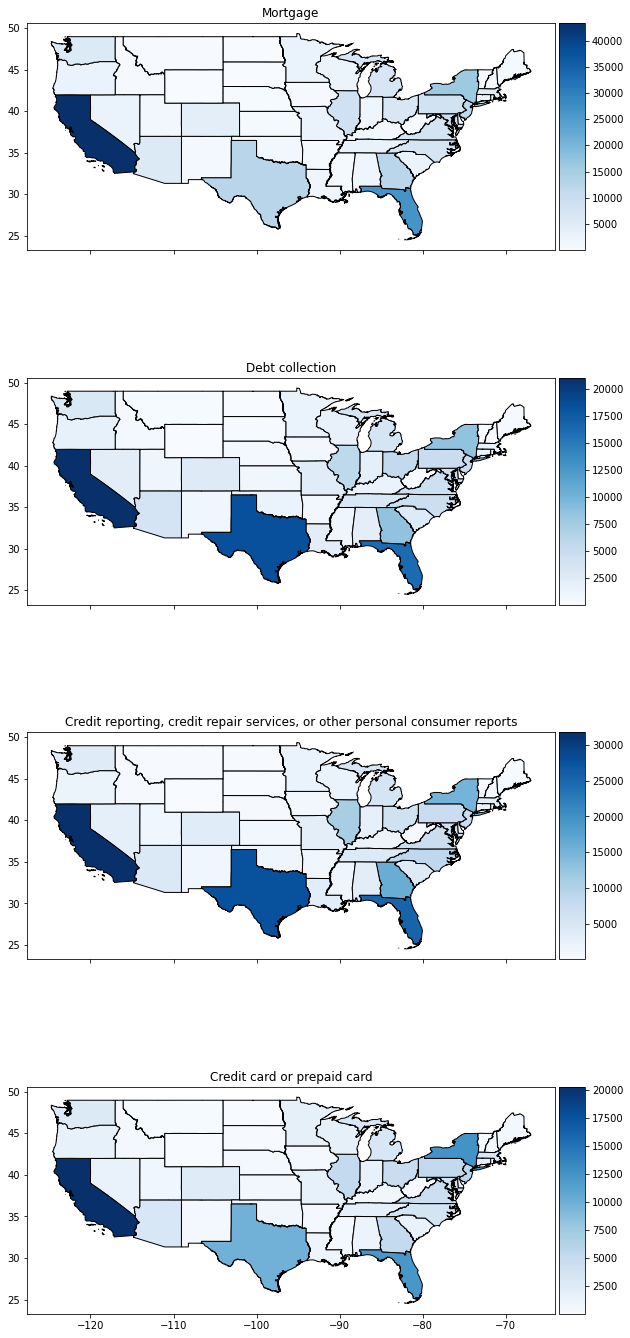

In [100]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax  = plt.subplots(4, figsize=(10, 25), sharex=True, sharey=True)
def prod2state( ax, product="Mortgage"):
    gp_state = data[data.Product==product].groupby('State').State.count()
    vmin = gp_state.min()
    vmax = gp_state.max()
    merged_df = map_df.merge(pd.Series.to_frame(gp_state), 
                         left_on="STUSPS", right_index=True, how="left")
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin = vmin, vmax = vmax))
    sm._A = []
    merged_df.plot(column = "State", ax = ax, cmap="Blues", linewidth=1.0, edgecolor='black')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(sm, cax=cax)
    ax.set_title(product)

#fig.tight_layout(w_pad=10)
prod2state(ax[0], 'Mortgage')
prod2state(ax[1], "Debt collection")
prod2state(ax[2], 'Credit reporting, credit repair services, or other personal consumer reports')
prod2state(ax[3], 'Credit card or prepaid card')